### 목표
- 데이터를 다운받아 딥러닝 신경망 모델 학습 및 예측, 평가과정을 거치자
- 다양한 방법을 사용하여 (중간층의 활성화 함수, 최적화 함수) 최적의 조합을 찾아보는 실습 진행

In [200]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [201]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [202]:
# 데이터 형태 확인
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


<function matplotlib.pyplot.show(close=None, block=None)>

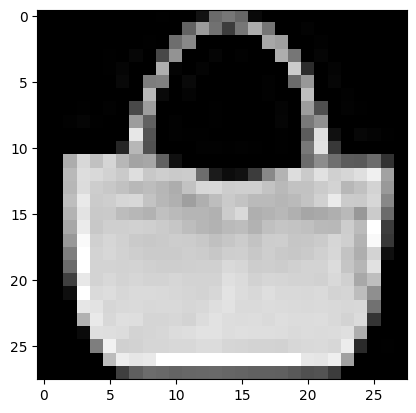

In [203]:
# 패션이미지 출력
plt.imshow(X_train[100], cmap='gray')
plt.show

In [204]:
# 정답 데이터 확인
# class개수 -> 10개의 클래스를 가짐
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

0 : T-shirt/top  
1 : Trouser  
2 : Pullover  
3 : Dress  
4 : Coat  
5 : Sandal  
6 : Shirt  
7 : Sneaker  
8 : Bag  
9 : Ankel boo  

- sigmoid + SGD 조합
- 중간층 성능
    - 5개층 (64,128,256,128,64)

In [205]:
# 신경망 모델 설계 -> model1
# 학습방법 및 평가 방법 설정
# 모델학습 -> h1
# 학습결과 시각화

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0977 - loss: 2.3134 - val_accuracy: 0.0983 - val_loss: 2.3035
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0993 - loss: 2.3034 - val_accuracy: 0.1003 - val_loss: 2.3041
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0942 - loss: 2.3033 - val_accuracy: 0.0957 - val_loss: 2.3027
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1000 - loss: 2.3029 - val_accuracy: 0.0957 - val_loss: 2.3031
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1061 - loss: 2.3025 - val_accuracy: 0.1003 - val_loss: 2.3014
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1039 - loss: 2.3021 - val_accuracy: 0.0983 - val_loss: 2.3013
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1079 - loss: 2.3015 - val_accuracy: 0.1145 - val_loss: 2.3010
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1158 - loss: 2.3012 - val_accuracy: 0.

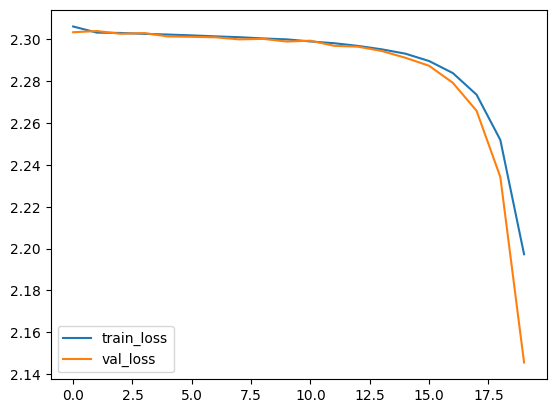

In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import SGD, Adam # 최적화 함수 클래스

# 모델설계
model1 = Sequential()
model1.add(InputLayer(shape=(28,28)))
model1.add(Flatten())
model1.add(Dense(units=64, activation='sigmoid'))
model1.add(Dense(units=128, activation='sigmoid'))
model1.add(Dense(units=256, activation='sigmoid'))
model1.add(Dense(units=128, activation='sigmoid'))
model1.add(Dense(units=64, activation='sigmoid'))
model1.add(Dense(units=10, activation='softmax'))
# 학습방법 설정
model1.compile(loss='sparse_categorical_crossentropy',
                optimizer='SGD', # 확률적 경사하강법
                metrics=['accuracy'])
# 모델학습
h1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=64)
# 학습결과 시각화
plt.plot(h1.history['loss'], label = "train_loss")
plt.plot(h1.history['val_loss'], label = "val_loss")
plt.legend()
plt.show() 
# 왜 학습이 제대로 되지 않는지 확인
# 1. 중간층의 활성화 함수 sigmoid -> 기울기 소실 문제

2. relu+SGD

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1791 - loss: 2.2934 - val_accuracy: 0.2589 - val_loss: 2.2547
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2854 - loss: 2.2357 - val_accuracy: 0.3806 - val_loss: 2.1598
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4139 - loss: 2.1180 - val_accuracy: 0.5329 - val_loss: 1.9318
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5475 - loss: 1.8367 - val_accuracy: 0.6326 - val_loss: 1.4718
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6538 - loss: 1.3544 - val_accuracy: 0.7336 - val_loss: 1.0185
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7362 - loss: 0.9691 - val_accuracy: 0.7825 - val_loss: 0.7689
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7772 - loss: 0.7666 - val_accuracy: 0.8124 - val_loss: 0.6451
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8044 - loss: 0.6589 - val_accuracy: 0.

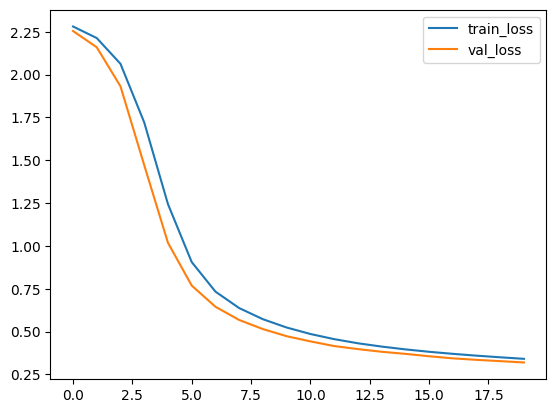

In [214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import SGD, Adam # 최적화 함수 클래스

# 모델설계
model2 = Sequential()
model2.add(InputLayer(shape=(28,28)))
model2.add(Flatten())
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=256, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=10, activation='softmax'))
# 학습방법 설정
model2.compile(loss='sparse_categorical_crossentropy',
                optimizer=SGD(learning_rate=0.001), # 확률적 경사하강법
                # SDG 기본 학습률 : 0.01 학습률이 크면 학습에 제대로 안되는 경우
                # 활성화 함수 -> sigmoid 오차가 소실되었는데 relu로 바꿔주면서 오차 소실X
                # 오차가 그대로 전달되다보니 변동이 큼 + 학습률 큼
                metrics=['accuracy'])
# 모델학습
h2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=64)
# 학습결과 시각화
plt.plot(h2.history['loss'], label = "train_loss")
plt.plot(h2.history['val_loss'], label = "val_loss")
plt.legend()
plt.show() 

3. relu+adam

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8153 - loss: 0.6078 - val_accuracy: 0.9471 - val_loss: 0.1747
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9584 - loss: 0.1384 - val_accuracy: 0.9649 - val_loss: 0.1197
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9694 - loss: 0.0963 - val_accuracy: 0.9651 - val_loss: 0.1172
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0763 - val_accuracy: 0.9672 - val_loss: 0.1158
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9783 - loss: 0.0683 - val_accuracy: 0.9720 - val_loss: 0.1013
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9844 - loss: 0.0491 - val_accuracy: 0.9664 - val_loss: 0.1141
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9846 - loss: 0.0483 - val_accuracy: 0.9713 - val_loss: 0.1039
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9880 - loss: 0.0391 - val_accuracy: 0.

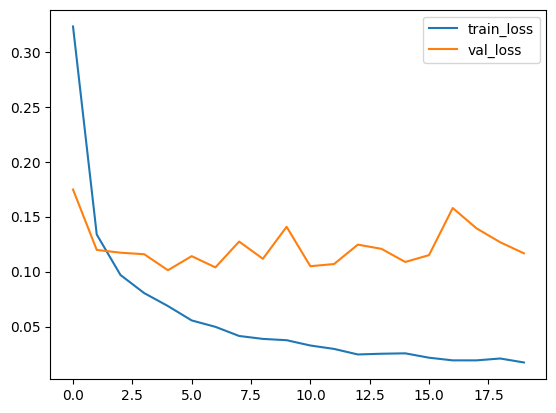

In [213]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import SGD, Adam # 최적화 함수 클래스

# 모델설계
model3 = Sequential()
model3.add(InputLayer(shape=(28,28)))
model3.add(Flatten())
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=256, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=64, activation='relu'))
model3.add(Dense(units=10, activation='softmax'))
# 학습방법 설정
model3.compile(loss='sparse_categorical_crossentropy',
                optimizer=Adam, # 확률적 경사하강법
                # Adam 기본학률 :0.001
                metrics=['accuracy'])
# 모델학습
h3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=64)
# 학습결과 시각화
plt.plot(h3.history['loss'], label = "train_loss")
plt.plot(h3.history['val_loss'], label = "val_loss")
plt.legend()
plt.show() 

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1013 - loss: 2.3215 - val_accuracy: 0.1060 - val_loss: 2.3090
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1033 - loss: 2.3066 - val_accuracy: 0.1060 - val_loss: 2.3072
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1063 - loss: 2.3056 - val_accuracy: 0.1035 - val_loss: 2.3021
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1061 - loss: 2.3046 - val_accuracy: 0.1060 - val_loss: 2.3057
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1055 - loss: 2.3038 - val_accuracy: 0.1060 - val_loss: 2.3042
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1124 - loss: 2.3019 - val_accuracy: 0.1060 - val_loss: 2.3051
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1099 - loss: 2.3035 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1081 - loss: 2.3023 - val_accuracy: 0.

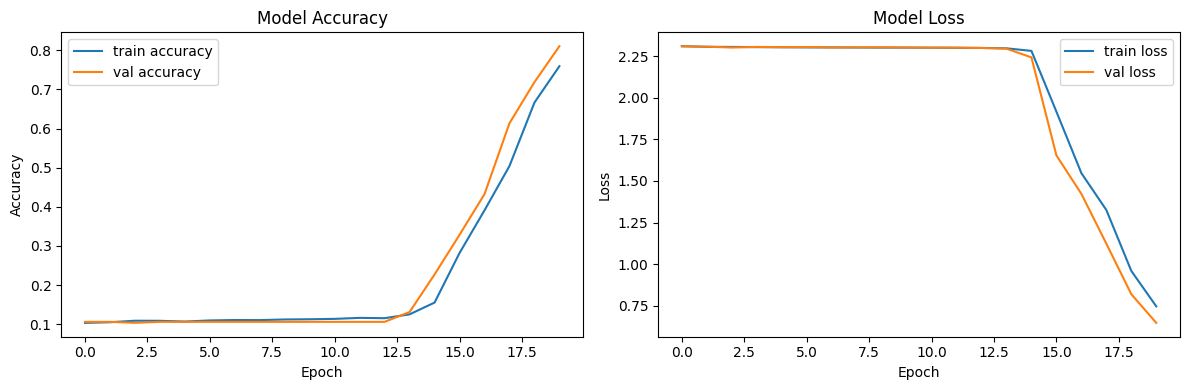

313/313 - 0s - 833us/step - accuracy: 0.8066 - loss: 0.6530

Test accuracy: 0.8065999746322632


In [208]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

# 신경망 모델 설계
model1 = Sequential()
# 입력층 설계
model1.add(InputLayer(shape=(28,28))) # 28*28의 2차원 데이터
model1.add(Flatten()) # 2차원 형태의 사진데이터를 1차원 변경(선형모델학습을 위함)
# 중간층(은닉층)
model1.add(Dense(units=64, activation='sigmoid'))
model1.add(Dense(units=128, activation='sigmoid'))
model1.add(Dense(units=256, activation='sigmoid'))
model1.add(Dense(units=128, activation='sigmoid'))
model1.add(Dense(units=64, activation='sigmoid'))
# 출력층 -> 출력데이터의 형태 지정(다중분류)
model1.add(Dense(units=10, activation="softmax"))

# 모델 학습방법 및 평가 방법 설정
sgd = SGD(learning_rate=0.01, momentum=0.9)
model1.compile(loss='sparse_categorical_crossentropy',
                optimizer=sgd,
                metrics=['accuracy'])

# 모델 학습
h1 = model1.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=20)

# 학습 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(h1.history['accuracy'], label='train accuracy')
plt.plot(h1.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(h1.history['loss'], label='train loss')
plt.plot(h1.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 테스트 세트에 대한 평가
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
# Flatten : 2차원의 사진데이터를 선형모델이 처리할 수 있는 1차원 데이터 변경
# 현재 우리의 데이터 2차원(28*28) -> 1차원

In [210]:
op = ['SGD','adam']
act = ['sigmoid', 'relu']

In [211]:
for act,op in zip(act,op):
    # 신경망 모델 설계
    # 뼈대생성
    model1 = Sequential()
    # 입력층
    model1.add(InputLayer(input_shape=(28,28))) # 28*28 2차원 데이터
    model1.add(Flatten()) # 2차원형태의 사진데이터를 1차원 변경 ( 선형모델 학습을 위함 )
    # 중간층, 은닉층
    model1.add(Dense(units = 64, activation=act))
    model1.add(Dense(units = 128, activation=act))
    model1.add(Dense(units = 256, activation=act))
    model1.add(Dense(units = 128, activation=act))
    model1.add(Dense(units = 64, activation=act))
    # 출력층 -> 출력데이터의 형태 지정 ( 다중 분류 )
    model1.add(Dense(10, activation='softmax'))
    # 출력층에서의 활성화함수의 역할: 출력데이터의 형태 변경
    # 분류 : 확률값 출력
    # 다중분류 -> 클래스 개수만큼의 확률값이 출력
    # softmax함수 : 클래스의 개수만큼의 결과값이 출력-> 총합 1인 확률로 변경d


    model1.compile(loss='sparse_categorical_crossentropy',
                optimizer=op,
                metrics=['accuracy'])

    max_ac = np.array(h.history['accuracy']).max()
    if act =='sigmoid':
        h1 = model1.fit(X_train, y_train, validation_split=0.2,batch_size=64,  epochs=20)
    else:
        h2 = model1.fit(X_train, y_train, validation_split=0.2,batch_size=64,  epochs=20)

c:\Users\chxss\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1069 - loss: 2.3209 - val_accuracy: 0.1081 - val_loss: 2.3017
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1089 - loss: 2.3019 - val_accuracy: 0.1060 - val_loss: 2.3030
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1122 - loss: 2.3019 - val_accuracy: 0.1060 - val_loss: 2.3023
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1116 - loss: 2.3019 - val_accuracy: 0.1060 - val_loss: 2.3031
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1139 - loss: 2.3015 - val_accuracy: 0.1060 - val_loss: 2.3026
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1123 - loss: 2.3020 - val_accuracy: 0.1060 - val_loss: 2.3024
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1127 - loss: 2.3017 - val_accuracy: 0.1060 - val_loss: 2.3022
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1145 - loss: 2.3017 - val_accuracy: 0.

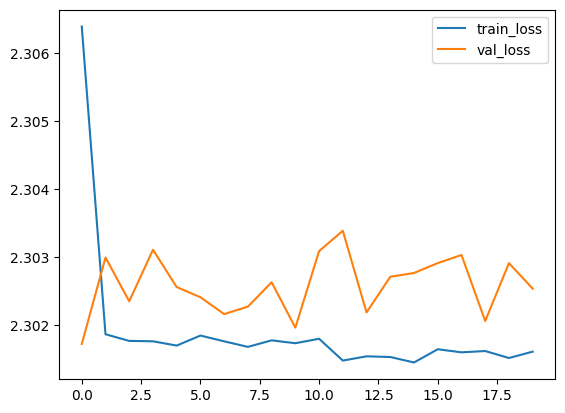

In [212]:
# 학습결과 시각화
plt.plot(h1.history['loss'], label = "train_loss")
plt.plot(h1.history['val_loss'], label = "val_loss")
plt.legend()
plt.show() 